In [1]:
import numpy as np
import pandas as pd 

In [2]:
df = pd.read_csv("covid_toy.csv")

In [3]:
df.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [ ]:
df.isnull().sum()
# fever column has null values 

age           0
gender        0
fever        10
cough         0
city          0
has_covid     0
dtype: int64

In [5]:
df.isnull().mean()*100

age           0.0
gender        0.0
fever        10.0
cough         0.0
city          0.0
has_covid     0.0
dtype: float64

In [6]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.25 and df[var].isnull().mean() > 0]

In [7]:
cols

['fever']

In [8]:
df[cols].sample(5)

,fever
35,102.0
21,98.0
81,99.0
60,102.0
50,101.0


In [9]:
df['fever'].value_counts()

fever
101.0    17
98.0     17
104.0    14
100.0    13
99.0     10
102.0    10
103.0     9
Name: count, dtype: int64

In [10]:
len(df[cols].dropna())/len(df)

0.9

In [11]:
new_df = df[cols].dropna()
df.shape,new_df.shape

((100, 6), (90, 1))

In [12]:
import matplotlib.pyplot as plt

<Axes: >

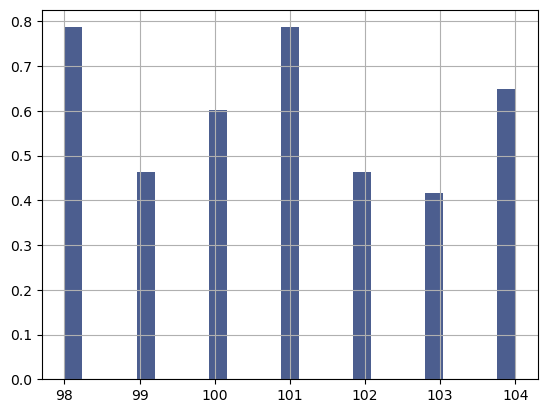

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
# original data 
df['fever'].hist(bins = 25 , ax = ax , density = True ,color = 'red')

# data after cca 
new_df['fever'].hist(bins = 25 , ax = ax , density = True ,alpha = 0.8)


In [18]:
temp = pd.concat([
    # percent of obser per cat , org dat
    df['fever'].value_counts()/len(df),


    # per of obser per cat , cca dat
    new_df['fever'].value_counts()/len(new_df)
],axis = 1)

temp.columns = ['original','cca']
temp

,original,cca
fever,,
101.0,0.17,0.188889
98.0,0.17,0.188889
104.0,0.14,0.155556
100.0,0.13,0.144444
99.0,0.10,0.111111
102.0,0.10,0.111111
103.0,0.09,0.100000


In [19]:
temp  = pd.concat([
    # per of obser per cat , org data
    df['fever'].value_counts()/len(df)

    # per of obser per cat dat , cca dat
    , new_df['fever'].value_counts()/len(new_df)
], axis = 1 )

temp.columns = ['original' , 'cca']
temp

,original,cca
fever,,
101.0,0.17,0.188889
98.0,0.17,0.188889
104.0,0.14,0.155556
100.0,0.13,0.144444
99.0,0.10,0.111111
102.0,0.10,0.111111
103.0,0.09,0.100000
